# Hotel Bookings Dataset - Sample Models

In [45]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Models Using H1

In [89]:
h1 = pd.read_csv('h1_s.csv')

In [90]:
h1.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'Agent', 'Company',
       'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'Corporate', 'Direct', 'TA/TO', 'Deposit',
       'RoomTypeDifference', 'Contract', 'Group', 'Transient',
       'Transient-Party'],
      dtype='object')

In [91]:
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,TotalOfSpecialRequests,Corporate,Direct,TA/TO,Deposit,RoomTypeDifference,Contract,Group,Transient,Transient-Party
0,1,72,2016,December,53,30,1,2,2,0,...,0,0,1,0,0,0,0,0,1,0
1,0,2,2017,February,8,23,0,2,3,0,...,0,0,0,1,0,1,0,0,0,1
2,0,126,2016,September,38,16,2,5,2,0,...,0,0,0,1,0,0,0,0,1,0
3,1,122,2016,May,22,27,0,1,2,0,...,2,0,0,1,0,0,0,0,1,0
4,0,0,2015,December,49,3,0,1,2,0,...,1,0,1,0,0,1,0,0,1,0


In [92]:
# columns to use in model
model_cols = h1.drop(['IsCanceled', 'ArrivalDateMonth'], axis=1).columns

X_train, X_test, y_train, y_test = train_test_split(
    h1[model_cols], 
    h1['IsCanceled'], 
    test_size=.6, 
    random_state=1
)

In [93]:
clf = DecisionTreeClassifier(ccp_alpha=.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [94]:
conf = confusion_matrix(y_test, clf.predict(X_test))
print((conf[0, 1]+conf[1, 0])/np.sum(conf))

print(clf.score(X_test, y_test), '\n')

pd.Series(clf.feature_importances_*100, index=model_cols)

0.24041666666666667
0.7595833333333334 



LeadTime                       22.269560
ArrivalDateYear                 0.000000
ArrivalDateWeekNumber           0.000000
ArrivalDateDayOfMonth           0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.000000
Adults                          0.000000
Children                        0.000000
Babies                          0.000000
Meal                            0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           0.000000
PreviousBookingsNotCanceled     0.000000
BookingChanges                  0.000000
Agent                           0.000000
Company                         0.000000
DaysInWaitingList               0.000000
ADR                             0.000000
RequiredCarParkingSpaces       16.758988
TotalOfSpecialRequests          0.000000
Corporate                       0.000000
Direct                          0.000000
TA/TO                           0.000000
Deposit                        35.472721
RoomTypeDifferen

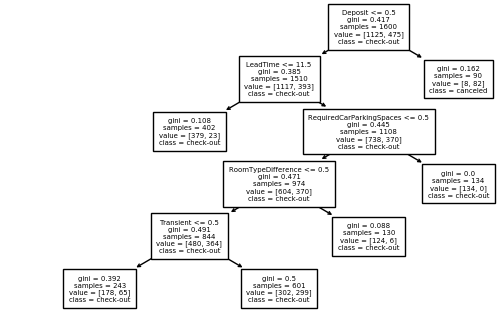

In [95]:
figure(figsize=(5, 3), dpi=100)
tree.plot_tree(clf, feature_names=clf.feature_names_in_, class_names=['check-out', 'canceled'], fontsize=5);

### Random Forest

In [96]:
rf = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=30,
    random_state=1)

rf.fit(X_train, y_train)

conf = confusion_matrix(y_test, rf.predict(X_test))
print((conf[0, 1]+conf[1, 0])/np.sum(conf), '\n')

print(rf.score(X_test, y_test))

0.21916666666666668 

0.7808333333333334


In [97]:
pd.Series(rf.feature_importances_*100, index=model_cols)

LeadTime                       20.851115
ArrivalDateYear                 1.305938
ArrivalDateWeekNumber           2.522638
ArrivalDateDayOfMonth           2.929376
StaysInWeekendNights            1.280374
StaysInWeekNights               4.152110
Adults                          0.977942
Children                        0.891634
Babies                          0.000000
Meal                            0.011513
IsRepeatedGuest                 0.223919
PreviousCancellations           1.743818
PreviousBookingsNotCanceled     0.798169
BookingChanges                  3.772911
Agent                           0.552660
Company                         0.164210
DaysInWaitingList               0.000000
ADR                             4.996643
RequiredCarParkingSpaces       10.103733
TotalOfSpecialRequests          2.675771
Corporate                       0.041969
Direct                          1.418008
TA/TO                           1.723592
Deposit                        16.793404
RoomTypeDifferen

----

## Models Using H2

In [98]:
h2 = pd.read_csv('h2_s.csv')

In [99]:
model_cols = h2.drop(['IsCanceled', 'ArrivalDateMonth'], axis=1).columns

X_train, X_test, y_train, y_test = train_test_split(
    h2[model_cols], 
    h2['IsCanceled'], 
    test_size=.6, 
    random_state=1
)

In [100]:
clf = DecisionTreeClassifier(ccp_alpha=.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [101]:
conf = confusion_matrix(y_test, clf.predict(X_test))
print((conf[0, 1]+conf[1, 0])/np.sum(conf), '\n')

print(clf.score(X_test, y_test))

0.24041666666666667 

0.7595833333333334


In [102]:
pd.Series(clf.feature_importances_*100, index=model_cols)

LeadTime                        6.553028
ArrivalDateYear                 0.000000
ArrivalDateWeekNumber           0.000000
ArrivalDateDayOfMonth           0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.000000
Adults                          0.000000
Children                        0.000000
Babies                          0.000000
Meal                            0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           8.670645
PreviousBookingsNotCanceled     0.000000
BookingChanges                  0.000000
Agent                           0.000000
Company                         0.000000
DaysInWaitingList               0.000000
ADR                             0.000000
RequiredCarParkingSpaces        0.000000
TotalOfSpecialRequests          7.103075
Corporate                       0.000000
Direct                          0.000000
GDS                             0.000000
TA/TO                           0.000000
Deposit         

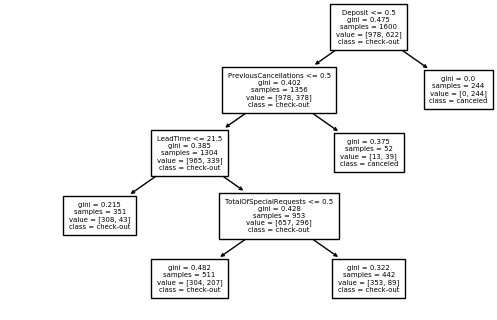

In [103]:
figure(figsize=(5, 3), dpi=100)
tree.plot_tree(clf, feature_names=clf.feature_names_in_, class_names=['check-out', 'canceled'], fontsize=5);

In [104]:
rf = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=30,
    random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=30, n_estimators=250, random_state=1)

In [105]:
conf = confusion_matrix(y_test, rf.predict(X_test))
print((conf[0, 1]+conf[1, 0])/np.sum(conf), '\n')

print(rf.score(X_test, y_test))

0.21958333333333332 

0.7804166666666666


In [106]:
pd.Series(rf.feature_importances_*100, index=model_cols)

LeadTime                       17.958865
ArrivalDateYear                 0.799743
ArrivalDateWeekNumber           2.215820
ArrivalDateDayOfMonth           1.292550
StaysInWeekendNights            0.575440
StaysInWeekNights               1.589893
Adults                          0.492061
Children                        0.134551
Babies                          0.000000
Meal                            0.245907
IsRepeatedGuest                 0.000000
PreviousCancellations           5.865565
PreviousBookingsNotCanceled     0.000000
BookingChanges                  2.996419
Agent                           0.184868
Company                         0.429344
DaysInWaitingList               0.263101
ADR                             4.316781
RequiredCarParkingSpaces        0.022858
TotalOfSpecialRequests         15.331938
Corporate                       0.114105
Direct                          0.424720
GDS                             0.000000
TA/TO                           1.685862
Deposit         